<a href="https://colab.research.google.com/github/Arun-purakkatt/Hands-On-Machine-Learning-with-Scikit-Learn-and-TensorFlow/blob/master/The_Machine_Learning_Landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 1. The Machine Learning Landscape**


The first ML application that really became maintream and improved the lives of 100s of millions of people took over in the 1990s, The Spam Filter.
We will take a look at the map and learn about the most notable regions of ML
Supervised versus Unsupervised Learning
Online versus batch learning
Instance-based versus model-based learning

**What is Machine Learning?**

Machine Learning is the science (and art) of programming computers so that they can learn from data.

Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed. — Arthur Samuel (1959)

A computer program is said to learn from experience $E$ with respect to some task $T$ and some performance measure $P$, if its performance on $T$, as measured by $P$, improves with experience $E$. — Tom Mitchell (1997).

**Why use Machine Learning?**

1.Make rules
2.Write Algorithm
3.If Algorithm performs well $\to$ deploy. If not, go to (1).

If the problem is complex, you'll likely endup with a long list of rules that are hard to maintain to scale to other similar problems.
A machine learning approach would be much shorter, easier to maintain, and in many cases, more accurate.
Machine Learning can help humans learn.
You can train an algorithm on a large dataset, then inspect the algorithm for feature importance to gain a better understanding of the relation between the data & the problem.
This is called data mining.

**Examples of Applications**

Image Classification: typically performed using convolutional neural networks

Semantic segmentation: when we want to classify each pixel in an image, example is brain tumor detection (will give us shape and location)

Natural Language Processing: & More specifically, text classification, which can be performed using RNNs, CNNs, or Transformers.

NLP: Automatic Text Summarization

Chatbot: Involves many NLP tasks such as Natural Language Understanding (NLU) and Question-Answering.

Forecasting your company's revenue next year: a regression task that can be tackled using multiple algorithms such as
Linear Regression
Polynomial Regression
SVM
Random Forest
Artificial Neural Networks
If sequences of past performance indicators are involved, we can use RNNs, CNNs or Transformers.

Making your app react to voice commands: This is speech recognition, can be tackled by recognizing the incoming audio signals using RNNs, CNNs or Transformers.

Detecting credit card fraud: this is anomaly detection.

Segmenting clients based on their purchases so you can design targeted more effective marketing campaigns, a Clustering problem

Representing a complex, high-dimensional dataset in a diagram: this is data visualization, typically using dimensionality reduction algorithms such as PCA.

Recommending a product based on the client's purchases history: this is a recommender system, where you can feed in the sequence of purchases to an artificial neural network to predict the next purchase.

Building an intelligent bot for a game: this is usually solved using reinforcement learning





**Types of Machine Learning Systems**



 Machine learning algorithms can be classified according to the amount of supervision they get during training They are 4 major categories


**1.   Supervised Learning:**

The training set you feed into the supervised learning algorithm contains the targets/labels/desired predictions.

Most supervised learning tasks fall under two umbrellas: Classification/Regression

Some regression-based models are used for classification as well, such as Logistic Regression which outputs a probability $\in [0,1]$

Here are some of the most important supervised learning algorithms




*   K-nearest Neighbors
*   Linear Regression
*   Logistic Regression
*   Decision Trees and Random Forests
*   Artificial Neural Networks
*   Naive Bayes


**2.   Semi-supervised Learning**

You have partially-labeled data
The goal is to not classify the unlebeled ones but to use them around the labeled points as helpers to solve the task
Most semi-supervised learning algorithms are a combination of unsupervised and supervised learning algorithms

**3.   Reinforcement Learning**

RL is a very different beast.
An agent observes the environment, selects an action, gets a reward, and updates its policy.

**4.   Unsupervised Learning**

The data is unlabeled, the system is trying to learn without a teacher.
Here are some unsupervised learning algorithms

Clustering : 
K-means
DBSCAN
Hirerchical Cluster Analysis

Anomaly Detection:
one-class SVM
Isolation Forest

Visualization & Dimensionality Reduction: the goal is to compress/simplify the data without losing too much information (1 way to do it is to merge highly correlated features)

Principal Component Analysis: PCA
t-distributed stochastic Neighbor Embedding: T-SNE
Autoencoders
Kernel PCA
Local Linear Embedding (LLE)

Association rule learning: find interesting relations between attributes
Apriori
Eclat












**Batch & Online Learning**

Another criterion to classify a machine learning algorithm is whether it learns from an incoming stream of data or not.

**Batch Learning**

In batch learning, the model is incapable of incrementally learning, It first learns from all of the available data offline, and then get deployed to produce predictions without feeding it any new data points.
Another name of batch learning is Offline Learning.

**Online Learning**

In online learning, you train data incrementally by continuously feeding it data instances as they come.

Either individually or in small groups of instances called mini-batches.
Each learning step is fast and cheap, so the system can learn as data comes, on the fly.

Online learning is great for system that receive data in a continuous flow.
Think about Online learning as incremental learning.

One important aspect of online learning is how fast the learning algorithm should adapt to new data points 

With a big learning rate — the model tends to forget past data and lean heavily towards new data points.

With a small learning rate — the model tends to slightly adapt to new data points but keeps its knowledge on old data points mostly intact.

A big challenge with online learning algorithms is that they can be damaged with bad incoming data points and clients will notice that on the fly
To mitigate this, you can:Closely monitor the system through performance metrics, turn off online learning or revert back to a previous model state.
Clean the data before feeding it to the model by scanning it for anomaly/outlier detection

**Instance-based versus Model-based Learning**

One other way to categorize machine learning algorithms is how they generalize
There are two approaches to generalization: instance-based approaches and model-based approaches.

**Instance-based Learning**

Similarity-based comparison, a new data point would be classified based on its similarity to the target group in the training set, this would require a measure of similarity.

**Model-based Learning**

Another way to make predictions is to build a model for each class of data points and then use the model to classify a new data point (from the validation/test/production environment).

What follows is an example of model-based learning using linear regression:

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

In [0]:
# URLs for data
gdp_data_url = 'https://educational-data-samples.s3.amazonaws.com/books/hands-on-ML/WEO_Data.csv'
oecd_data_url = 'https://educational-data-samples.s3.amazonaws.com/books/hands-on-ML/OECD.csv'

In [0]:
# get data & import it as a dataframe
gdp = pd.read_csv(gdp_data_url, sep='\t', encoding='latin1', thousands=',', na_values='n/a').dropna()
gdp.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [0]:
# get oecd data & import it as a dataframe
oecd = pd.read_csv(oecd_data_url, thousands=',')[['Country', 'Indicator', 'Measure', 'Inequality', 'Unit', 'PowerCode', 'Value']]
oecd.head()

,Country,Indicator,Measure,Inequality,Unit,PowerCode,Value
0,Australia,Labour market insecurity,Value,Total,Percentage,Units,5.4
1,Austria,Labour market insecurity,Value,Total,Percentage,Units,3.5
2,Belgium,Labour market insecurity,Value,Total,Percentage,Units,3.7
3,Canada,Labour market insecurity,Value,Total,Percentage,Units,6.0
4,Czech Republic,Labour market insecurity,Value,Total,Percentage,Units,3.1


In [0]:
# Get countries + Life satisfaction
oecd = oecd[['Country', 'Value']][oecd['Indicator'] == 'Life satisfaction']
oecd = oecd.rename(columns={'Value': 'Life satisfaction'})
oecd.head()

,Country,Life satisfaction
1812,Australia,7.3
1813,Austria,7.1
1814,Belgium,6.9
1815,Canada,7.4
1816,Czech Republic,6.7


In [0]:
# Get countries + GDP
gdp = gdp[['Country', '2015']]
gdp = gdp.rename(columns={'2015': 'GDP per capita (USD)'})
# filter to get a similar dataframe to the book's
gdp = gdp[gdp['GDP per capita (USD)'] <= 60000]
gdp.head()

,Country,GDP per capita (USD)
0,Afghanistan,599.994
1,Albania,3995.383
2,Algeria,4318.135
3,Angola,4100.315
4,Antigua and Barbuda,14414.302


In [0]:

# Join GDP & Life satisfaction tables + Group by country as the unique column and average-aggregate GDP & Life satisfaction
country_stats = pd.merge(gdp, oecd, on='Country').groupby(['Country']).mean().reset_index()
country_stats.head()

,Country,GDP per capita (USD),Life satisfaction
0,Australia,50961.865,7.350
1,Austria,43724.031,7.225
2,Belgium,40106.632,7.000
3,Brazil,8669.998,6.400
4,Canada,43331.961,7.425


In [0]:
# get GDP for the x-axis and Life Satisfaction for the y-axis
X = country_stats['GDP per capita (USD)'].values.reshape(-1, 1)
y = country_stats['Life satisfaction'].values.reshape(-1, 1)
X.shape, y.shape

((37, 1), (37, 1))

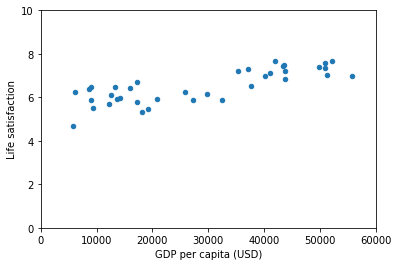

In [0]:
# Visualize Data
country_stats.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', xlim=(0, 60000), ylim=(0,10))
plt.show()

In [0]:
# Select a Linear Model
model = sklearn.linear_model.LinearRegression()

In [0]:
# Train the Model
model.fit(X, y,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus GDP per capita
print(model.predict(X_new))

[[6.2910907]]


In [0]:
# let's visualize our model, because it's a linear one, we can plot it using two points
X = [[10000], [50000]]
y_hat = model.predict(X)

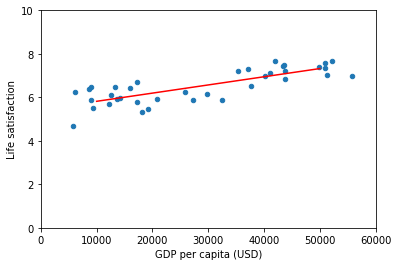

In [0]:
# Visualize Data
country_stats.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', xlim=(0, 60000), ylim=(0,10))
plt.plot(X, y_hat, c='red')
plt.show()

In summary, a machine learning project looks like this:

Studying the data — Exploratory data analysis

Model Selection

Model Training

Inference


**Main Challenges of Machine Learning**

The two things that can go wrong are: Bad learning algorithm, Bad data.

Insufficient quantity of training data:

> Even for very simple ml algorihtms, it takes thousands of examples for it to recognize Cat/Dog.
A famous paper showed the many algorithms, ranging from very simple ones to complex, perform relatively the same when given enough data.
The authors argued that we should reconsider where companies should invest their money, in algorithms development or in data corpuses engineering.

Non-representative training data:
> In order to generalize well, It's important that your training data be representative of the data that you want to use the system forIf the sample is too small, you will have sampling noise.
But even large samples can be non-representative if the sampling method is flawed, this is called sampling bias.
Example of sampling bias — Non-response bias.














Poor quality data

> Obviously, if your training data is full of outliers, errors, and noise, it will make it harder for the algorithm to detect the underlying patterns, resulting in a bad model.
It's often well worth the time to sit down and properly clean and investigate your data before doing any modeling.

Example of data cleaning:


*   If some instances (data points/rows) are clearly outliers, it may be logical to just discard them or manually fix them.
*   if some instances are missing a few features, you have multiple options: Discard the instances, fill them with median, train two models (one w/ features and one w/o it).

Irrelevant features

*   You system will only learn if your data contains many relevant features and not so many irrelevant ones.
*   A critical part of the success of a machine learning project is what's called feature engineering or coming up with features that would produce a quality model, it contains two steps:


*   Feature selection: selecting the most useful features to train on
*   Feature Extraction: adding new features based of the existing ones.
*   Creating new features by gathering new data.













Overfitting the training data:


*   Say you visited a foreign country and a taxi driver ripped you off, that is overfitting, we do it all the time and we adjust our beliefs as we get more data.
*   Machines, unfortunately, do it as well.
*   Overfitting means the predictive system performs well on the training data but fails to generalize.
*   Complex models such as deep neural networks tend to memorize training data noise or even the data sample itself if its small enough.

Possible solutions:
*   Select a model with fewer weights/parameters to constrain its predictive power so that it can use only the strongest present patterns
*   Gather more training data
*   Reduce the noise in the training data, fix errors and eliminate outliers.

Constraining a model to make it simpler and fighting overfitting is called regularization.
In the case a a simple linear model, it has two degrees of freedom (2 parameters)

If we let the algorithm change one parameter's values freely but have a set interval around parameter 2, it will have a between 1 and 2 degree of freedom.

You want a good balance between keeping the model as simple as possible while giving the model the ability to capture out of training data patterns.

Regularization can be controlled using hyperparameters, hyperparameters describe how the model should learn, not the parameters of the model itself.













Underfitting the Training Data:

Underfitting is the opposite of overfitting

It occurs when your model is too simple to capture the underlying structure of the training data

Here are solutions to the problem:

Select a more powerful model, with more parameters

Feed better features to the learning algorithm (feature engineering)

Reduce the constraints on the model (reduce regularization)


**Testing & Validating**

You evaluate your model by splitting your data into two sets: training and testing data sets.

You only care about out-of-training error, or generalization error, as it is representative of the model's performance in a production environment.

If your training error is low but your testing error is high, this means that you model is overfitting.

It's common to use 80% of the data for training and the remaining 20% for testing.
But it's dependent on the size of the original data set, the bigger it is, the less percent you can take as a testing set.

Hyper-parameter tuning & model selection:

If you fine-tune regularization parameters on the test set, you are sort of overfitting to it, so you need another data set for Hyper-parameter tuning, called validation set.

The validation set should be set aside from the training set.
After the holdout validation process (fine-tuning the hyper-parameters) you traing the model on the full training set (with validation) & evaluate on the test set.

A solution to setting aside a large validation set is to perform repeated cross-validation.

It has a drawback though, you have to train the model N-repetitions.

Data Mismatch:

The validation set & the test set must be as representative as possible for the data you will use in production.

One solution to this when you have a broad range of data is to manually select cases that will show up in production as (validation/test) sets.

One Problem is that if the algorithm is performing poorly on the validation set you won't know if the cause is overfitting or if the training set isn't good for the task at hand.

A solution to this is to introduce another validation set, called 'train-dev' set.

After training you will validate the model on both train-dev & validation sets.
If evaluation is good on train-dev & bad on validation, this means that the data is not good for the task at hand.

If evaluation is bad on train-dev & bad on validation, this means overfitting or the algorithm/overall data is not good.

No Free Lunch Theorem

A model is a simplified version of the observations.

The simplifications are meant to discard noise and capture generalizable useful patterns that will be captured in production.

To decide what information to discard and what to keep, you must make assumptions.

For example, a linear model assumes that the relation between the input & output is fundamentally linear.

& the distance between the model line and the observations is essentially noise.

If you make no assumptions about the data, than there is no need to prefer one model over another

**Exercices**

**1. How would you define Machine Learning?**

Machine Learning is the ability to learn from data without being explicitly programmed.

**2. Can you name four types of problems where is shines?**

Image classification, Voice Recognition, Semantic Segmentation, Sentiment Analysis.

**3. What is a labeled training set?**

In the context of supervised learning, a labeled training set is a data set with available targets, what you want to predict is known before training.

Example: a training set composed of images of cats or dogs and the corresponding label (cat/dog) for each of the images.


**4. What are the two most common supervised tasks?**

Classification (where the target is categorical in nature) & Regression (where the labels are continuous in nature).

**5. Can you name four common unsupervised tasks?**

Clustering, Anomaly detection, Visualization, dimensionality reduction.

**6. What type of machine learning algorithm would you use to allow a robot to walk in many paths in an unknown terrain?**

Reinforcement learning.

**7. What type of algorithm would you use to segment your customers into multiple groups?**

An unsupervised clustering algorithm like: K-means, DBSCAN.

**8. Would you frame the problem of spam detection as a supervised learning or an unsupervised learning problem?**

It a supervised learning problem.

**9. What is an online learning system?**

An online learning system continues to learn from new data after being deployed in production, in contrast to a batch learning model which would stop learning after the initial training process.

**10. What is out-of-core learning?**

We use out-of-core learning algorithms when the training data can't fit ina computer's RAM.

**11. What type of learning algorithm relies on a similarity measure to make predictions?**

Instance-based models, an example of that is K-nearest neighbors.

**12. What is the difference between a model's parameters and a learning algorithm's hyper-parameter?**

A model's parameters are the knobs that, collectively, store the learned knowledge of the model, also called weights, they are continuously changed during training to minimize a cost function. Examples are a & b in a y = ax + b linear model.

A learning algorithm's hyper-parameter describes how the algorithm should learn and control the predictive power of the model, example is the learning rate, number of layers in a NN, regularization, batch size, they are set before training and aren't changed during training.

**13. What do model-based algorithms search for?**

A decision boundary.

**14. What is the most common strategy they use to succeed?**

They minimize a cost function that describe the distance between the predictions outputted by the model and the real target values.

**14. How do they make predictions?**

They start with a set of initial parameters, make predictions based on the input & their parameters, then adjust their parameters to minimize cost.

**15. Can you name 4 of the main challenges in machine learning?**

Algorithmic challenges — Model Overfitting, Model Underfitting.

Data challenges — Data mismatch, Noisy data.


**16. If your model performs great on the training data but fails on the test data, What is happening?**

Overfitting, the model starts memorizing noise present on the training data to further minimize the cost function.

**17. Can you name 3 possible solutions?**

Regularization, Adding more data, Simplifying the model.

**18. What is a test set? & Why you would want to use it?**

The whole data set is usually split into training data (~80%) and test data (~20%), we use test data to evaluate the generalizability of the model beyond the training data set.

**19. What is the purpose of a validation set?**

A validation set is used to fine-tune the models' hyper-parameters, what is called manual training, and leave the test set for the final evaluation.

**20. What is the train-dev set?, When do you use it? & How do you use it?**

the train-dev is a validation set that is taken from a broad training set after performing the train/validation/test split.

We use it when we have a broad training data set (ex. images of all animals) but specific validation/test set (zoo animal pics taken with mobile phones) and we want to correctly interpret the model's evaluation.

We train the model on the training data set, we evaluate on train-dev and validation, if model performs badly on both, we have an overfitting case, if the model performs good in train-dev and badly on validation we have a data mismatch we the learning doesn't generalize to our specific production data.

**21. What can go wrong if you tune hyper-parameters using the test set?**

I can accidentaly overfit the test set as well by manually finding hyper-parameters that perform well on the test set but doesn't generalize to production data.